In [99]:
def generate_std(m=2**31-1, a=16807):
    generate_std.current = (a*generate_std.current)%m  
    yield generate_std.current/m
generate_std.current = 2e002325471

import matplotlib.pyplot as plt
import math
import random
import numpy as np
from scipy import stats


def generate_weibull():
    current = (1/lmbd)*((-math.log(random.random()))**(1/alpha))
    yield current
    
"""
a, l
(1, 8)
(0.05, 5.7)
(3.2, 5.1)
"""
lmbd = 8
alpha = 1

def recovery_process(n):
    S = [0]
    for i in range(1,n):
        S.append(S[i-1] + next(generate_weibull()))
    return S

def recovery_function(alist):
    summ = alist[0]
    rf = [summ]
    for i in range(1, len(alist)):
        summ += alist[i]
        rf.append(summ / i + 1)
    return rf
        

st = np.random.RandomState(seed=123)
xi = stats.weibull_min.rvs(lmbd, scale=alpha, size=98, random_state=st).tolist()
mean, var, skew, kurt = stats.weibull_min.stats(lmbd, scale=alpha, moments='mvsk')
rf = recovery_function(xi)

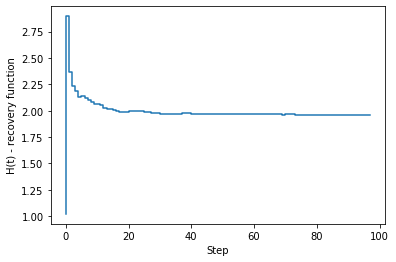

In [100]:
plt.step(range(0, len(rf)), rf)
plt.ylabel('H(t) - recovery function')
plt.xlabel('Step')
plt.show()

In [101]:
lmbd_experiment, loc_experimental, alpha_experimental = stats.weibull_min.fit(xi)

In [102]:
step = sum(xi) / 98
experimental = []
theoretic = []
for i in np.arange(0, sum(xi)-1, step):
    G_exp = math.exp(-math.pow((lmbd_experiment * i), alpha_experimental))
    G_theoretic = math.exp(-math.pow((lmbd * i), alpha))
    F_exp = 1 - G_exp
    F_theoretic = 1 - G_theoretic
    f_exp = alpha_experimental * lmbd_experiment * math.pow(alpha_experimental * lmbd_experiment, alpha_experimental - 1) * G_exp
    f_theoretic = alpha * lmbd * math.pow(alpha * lmbd, alpha - 1) * G_theoretic
    phi_exp = f_exp / G_exp
    phi_theoretic = f_theoretic / G_theoretic
    experimental.append({'G': G_exp, 'F': F_exp, 'f': f_exp, 'phi': phi_exp})
    theoretic.append({'G': G_theoretic, 'F': F_theoretic, 'f': f_theoretic, 'phi': phi_theoretic})

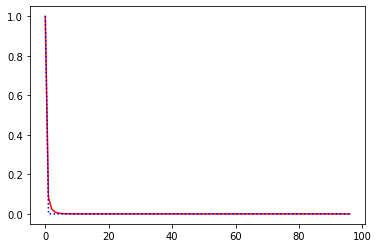

In [106]:
rng = range(0, len(experimental))
plt.plot(rng, list(map(lambda x: x['G'], experimental)), 'r-', rng, list(map(lambda x: x['G'], theoretic)), 'b:')
plt.show()